In [15]:
import sys; 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [5]:
import tensorflow as tf

# Load MINIST Data

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
print type(mnist)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
print mnist.train.images.shape
print mnist.test.images.shape

(55000, 784)
(10000, 784)


In [30]:
PIXELS = 784
IMG_SZ = np.sqrt( PIXELS ).astype(int)

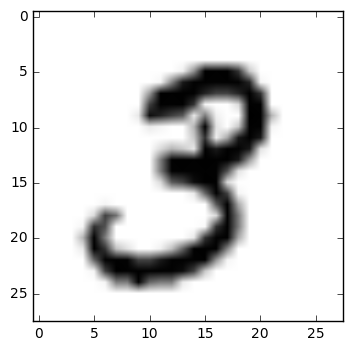

In [31]:
tmp = mnist.train.images[1] # np ndarray
tmp = tmp.reshape((IMG_SZ, IMG_SZ))
plt.imshow(tmp, cmap = cm.Greys)
plt.show()

In [11]:
sess = tf.InteractiveSession() # 

# One Layer NN

In [12]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [13]:
print type(x)

<class 'tensorflow.python.framework.ops.Tensor'>


In [14]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [15]:
print type(b)

<class 'tensorflow.python.ops.variables.Variable'>


In [16]:
sess.run(tf.initialize_all_variables())

In [17]:
y = tf.matmul(x,W) + b

In [18]:
print type(y)

<class 'tensorflow.python.framework.ops.Tensor'>


In [19]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

In [20]:
type(cross_entropy)

tensorflow.python.framework.ops.Tensor

In [21]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)  # defines an Op

In [22]:
type(train_step)

tensorflow.python.framework.ops.Operation

In [23]:
batch = mnist.train.next_batch(100)

In [34]:
batch[1][:2, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [35]:
for i in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [36]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [37]:
print correct_prediction

Tensor("Equal:0", shape=(?,), dtype=bool)


In [39]:
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9143


# Multilayer CNN

In [42]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [43]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')  # apply an Op

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [44]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [45]:
x_image = tf.reshape(x, [-1,28,28,1])

In [46]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [47]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [48]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [49]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [50]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [51]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) # defines an Op
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.22
step 100, training accuracy 0.9
step 200, training accuracy 0.96
step 300, training accuracy 0.86
step 400, training accuracy 0.98
step 500, training accuracy 0.94
step 600, training accuracy 0.98
step 700, training accuracy 0.98
step 800, training accuracy 0.96
step 900, training accuracy 0.98


In [32]:
print("test accuracy %g"%accuracy.eval(feed_dict={
                                        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

NameError: name 'accuracy' is not defined